In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("Transjakarta.csv")
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [3]:
df.info()
df.isna().sum()
df.duplicated('transID').sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

np.int64(0)

In [4]:
missing_data = df.isna().sum().sort_values(ascending=False)

missing_data

tapOutStops         2289
corridorName        1930
tapOutStopsLat      1344
stopEndSeq          1344
tapOutTime          1344
tapOutStopsLon      1344
tapOutStopsName     1344
corridorID          1257
tapInStops          1213
payAmount           1007
payCardID              0
transID                0
payCardName            0
payCardBank            0
payCardBirthDate       0
payCardSex             0
stopStartSeq           0
tapInStopsName         0
direction              0
tapInStopsLon          0
tapInStopsLat          0
tapInTime              0
dtype: int64

In [5]:
# Corridor: mengisi data yang nan, naT, None dengan "UNKNOWN" 
for col in ['corridorID', 'corridorName']:
    if col in df.columns:
        df[col] = df[col].astype(str)
        df.loc[df[col].isin(['nan', 'NaT', 'None']) | df[col].isna(), col] = 'UNKNOWN'


In [6]:
print("CorridorID UNKNOWN count:", (df['corridorID'] == "UNKNOWN").sum())
print("CorridorName UNKNOWN count:", (df['corridorName'] == "UNKNOWN").sum())

print("Still missing corridorID:", df['corridorID'].isna().sum())
print("Still missing corridorName:", df['corridorName'].isna().sum())

CorridorID UNKNOWN count: 1257
CorridorName UNKNOWN count: 1930
Still missing corridorID: 0
Still missing corridorName: 0


In [7]:
#incomplete trips: data tap out yang hilang = incomplete
tapout_cols = [
    'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat',
    'tapOutStopsLon', 'stopEndSeq', 'tapOutTime'
]

# True dan False diubah dengan 1 dan 0 karena mempermudah untuk nanti di tableu
df['is_incomplete_trip'] = df[tapout_cols].isna().any(axis=1).astype(int)


print("Incomplete trips flagged:", df['is_incomplete_trip'].sum())
print(df['is_incomplete_trip'].value_counts())


Incomplete trips flagged: 2289
is_incomplete_trip
0    35611
1     2289
Name: count, dtype: int64


In [8]:
df['payAmount'] = pd.to_numeric(df['payAmount'], errors='coerce')

df['is_fare_missing'] = df['payAmount'].isna().astype(int)
df['is_free']  = (df['payAmount'] == 0).astype(int)
df['is_paid']  = (df['payAmount'] > 0).astype(int)

print("Missing fares:", df['is_fare_missing'].sum())
print("Free trips:", df['is_free'].sum())
print("Paid trips:", df['is_paid'].sum())

Missing fares: 1007
Free trips: 16648
Paid trips: 20245


In [9]:
# Convert to datetime if not already
df['tapInTime'] = pd.to_datetime(df['tapInTime'], errors='coerce', infer_datetime_format=True)
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'], errors='coerce', infer_datetime_format=True)

# Compute trip duration in minutes
df['tripDurationMin'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

# Quick check
print(df['tripDurationMin'].describe())


count    36556.000000
mean        72.125424
std         28.072912
min         15.000000
25%         51.133333
50%         71.833333
75%         95.800000
max        179.050000
Name: tripDurationMin, dtype: float64


C:\Users\John Arnold Levi\AppData\Local\Temp\ipykernel_28312\3524549464.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['tapInTime'] = pd.to_datetime(df['tapInTime'], errors='coerce', infer_datetime_format=True)
C:\Users\John Arnold Levi\AppData\Local\Temp\ipykernel_28312\3524549464.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['tapOutTime'] = pd.to_datetime(df['tapOutTime'], errors='coerce', infer_datetime_format=True)


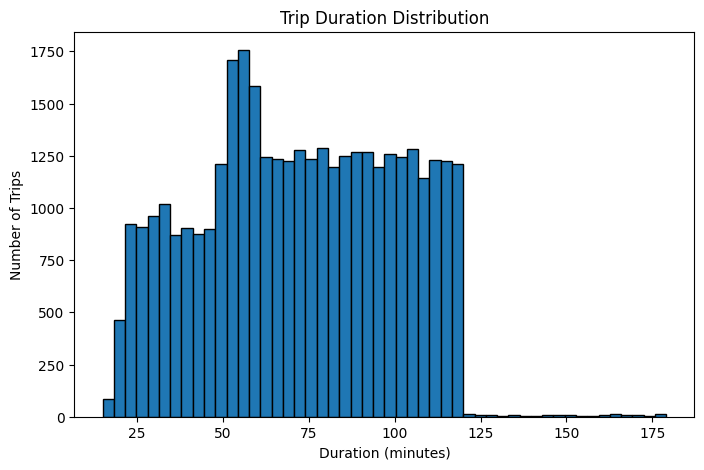

In [12]:
import matplotlib.pyplot as plt

# Plot histogram with edge outlines
plt.figure(figsize=(8,5))
plt.hist(df['tripDurationMin'].dropna(), bins=50, edgecolor='black')  # <- edgecolor added
plt.title("Trip Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Trips")
plt.show()
